The `dPULearn.compare_sets_negatives` method facilitates the comparison of identified negative samples across datasets. Providing identified negatives represented by '0' in the ``list_labels`` input, it returns a DataFrame (typically named ``df_neg_comp``) where each row is a sample and each column a dataset, indicating whether the sample is identified as a negative (True) or not (False) in the respective dataset:

In [21]:
import aaanalysis as aa
list_labels = [[1, 1, 0, 0, 2], [1, 1, 0, 2, 0], [1, 1, 2, 0, 0]]
dpul = aa.dPULearn()
df_neg_comp = dpul.compare_sets_negatives(list_labels=list_labels)
print(df_neg_comp)

   Set 1  Set 2  Set 3
2   True   True  False
3   True  False   True
4  False   True   True


By default, only rows containing at least one identified negative are returned. To return all rows, set ``remove_non_neg=False``: 

In [22]:
df_neg_comp = dpul.compare_sets_negatives(list_labels=list_labels, remove_non_neg=False)
print(df_neg_comp)

   Set 1  Set 2  Set 3
0  False  False  False
1  False  False  False
2   True   True  False
3   True  False   True
4  False   True   True


Names of the datasets can be provided by the ``names`` argument: 

In [23]:
names = ["Dataset 1", "Dataset 2", "Dataset 3"]
df_neg_comp = dpul.compare_sets_negatives(list_labels=list_labels, names=names)
print(df_neg_comp)

   Dataset 1  Dataset 2  Dataset 3
2       True       True      False
3       True      False       True
4      False       True       True


A DataFrame with sequence information (``df_seq``) and an requiered 'entry' column can be provdied, which is then merged with the ``df_neg_comp`` output DataFrame:

In [24]:
import pandas as pd
df_seq = pd.DataFrame([("entry1", "AA"), ("entry2", "BB"), ("entry3", "CC"), ("entry4", "DD"), ("entry5", "EE")], columns=["entry", "sequence"])
df_neg_comp = dpul.compare_sets_negatives(list_labels=list_labels, df_seq=df_seq)
print(df_neg_comp)

    entry sequence  Set 1  Set 2  Set 3
2  entry3       CC   True   True  False
3  entry4       DD   True  False   True
4  entry5       EE  False   True   True


Such overlaps are conveniently visualized using Venn diagrams, but they are limited to a maximum of three datasets. For comparing more than three datasets, an Upset Plot is a better choice. To facilitate this, set ``return_upset_data=True`` to generate a data structure directly compatible with the Upset Plot visualizations:   

Set 1  Set 2  Set 3  Set 4
False  True   True   True     2
True   False  False  True     1
dtype: int64


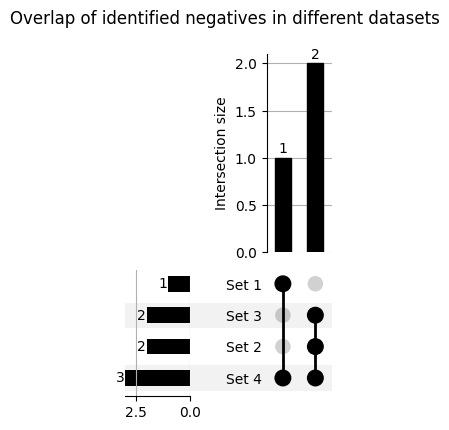

In [25]:
from upsetplot import plot
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore', category=FutureWarning)
list_labels = [[1, 1, 0, 2, 2], [1, 1, 2, 0, 0], [1, 1, 2, 0, 0], [1, 1, 0, 0, 0]]
upset_data = dpul.compare_sets_negatives(list_labels=list_labels, return_upset_data=True)
print(upset_data)
plot(upset_data, show_counts='%d')
plt.suptitle("Overlap of identified negatives in different datasets")
plt.show()